# Average firing rate

In [2]:
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from param import *
from dataloader import UniformSegmentDataset, BaseDataset
from utils.plot_utils import label_diff

data_list = ParamDir().data_list

## average firing rate per neuron

In [18]:
# mouse_name = "091317 OF CaMKII HKO M19-n1" # KO that passed the test
# data_dir = ParamDir().DATA_ROOT / mouse_name
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]

pass_res_KO = []
not_pass_res_KO = []
for mouse_id, data_dir in enumerate(KO_data_list):
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)
    avg_fr = np.hstack(X_train).mean(axis=1) # total spikes/segment
    # avg_fr = X_train.mean(axis=1).mean(axis=1) * 3 # average firing rate, unit spikes/s

    if mouse_id+1 in [1]:
        pass_res_KO.extend(avg_fr)
    else:
        not_pass_res_KO.extend(avg_fr)

WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]

pass_res_WT = []
not_pass_res_WT = []
for mouse_id, data_dir in enumerate(WT_data_list):
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)
    avg_fr = np.hstack(X_train).mean(axis=1) # total spikes/segment
    # avg_fr = X_train.mean(axis=1).mean(axis=1) * 3 # average firing rate, unit spikes/s

    if mouse_id+1 not in [1, 2, 4]: # mice that didnot pass
        pass_res_WT.extend(avg_fr)
    else:
        not_pass_res_WT.extend(avg_fr)



In [19]:
stats.ttest_ind(pass_res_KO, not_pass_res_KO)

Ttest_indResult(statistic=3.974097310619906, pvalue=8.987171181633527e-05)

In [20]:
stats.ttest_ind(pass_res_WT, not_pass_res_WT)

Ttest_indResult(statistic=-2.0067724278092167, pvalue=0.04531501180614839)

Text(0.5, 0.98, 'firing rate per neuron during training\nvaried num of samples')

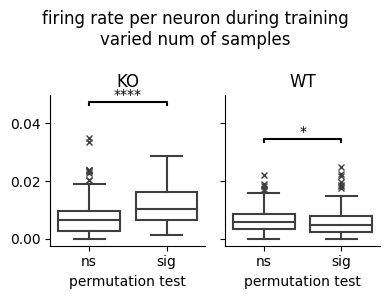

In [25]:
fig, axes = plt.subplots(figsize=(4,3), ncols=2, tight_layout = True, sharey=True)
sns.despine()

sns.boxplot([not_pass_res_KO, pass_res_KO], 
            ax=axes[0],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
axes[0].set_title("KO")
axes[0].set_xticklabels(["ns", "sig"])
axes[0].set_xlabel("permutation test")
label_diff(0, 1, "****", 
           ind=range(2), 
           Y=[np.mean(not_pass_res_KO), np.mean(pass_res_KO)], 
           errors=[np.max(not_pass_res_KO), np.max(pass_res_KO)], 
           ax=axes[0], 
           barh=.001)

sns.boxplot([not_pass_res_WT, pass_res_WT], 
            ax=axes[1],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})

axes[1].set_title("WT")
axes[1].set_xticklabels(["ns", "sig"])
axes[1].set_xlabel("permutation test")
label_diff(0, 1, "*", 
           ind=range(2), 
           Y=[np.mean(not_pass_res_WT), np.mean(pass_res_WT)], 
           errors=[np.max(not_pass_res_WT), np.max(pass_res_WT)], 
           ax=axes[1], 
           barh=.001)

plt.suptitle("firing rate per neuron during training\nvaried num of samples")